In [3]:
import numpy as np
from autograd import numpy as anp
import  matplotlib.pyplot as plt
from python_files.maxent import MaxEnt
import python_files.densities as d

In [4]:
# #assume mean=0, var=1
# def f_SkewKurt(x):
#     return np.array([x,x**2,x**3,x**4])

# def b_SkewKurt(skew,kurt):
#     return np.array([0, 1, skew, kurt])


In [5]:
skew = 0
kurt = 3


u = 20
l = -20
n = 60

The algorithm may not be converging.
Use 'ob._visualize_algorithm()' to inspect.
The resulting parameters:
  Lambda_1 = -0.000
  Lambda_2 = 224.457
  Lambda_3 = 0.000
  Lambda_4 = -89.570


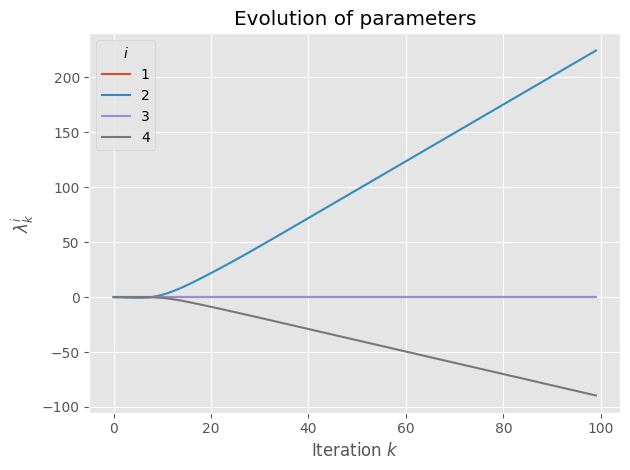

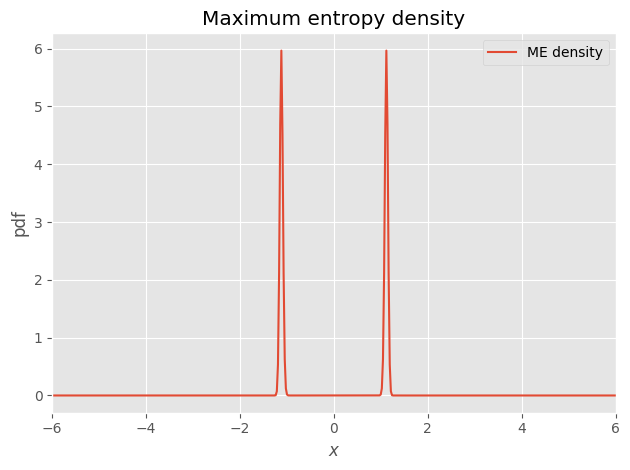

In [11]:
ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(skew,kurt),
                     f_vector=d.f_constraint_skewkurt)

ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution()

Normal distr, as should be.

The resulting parameters:
  Lambda_1 = -1.664
  Lambda_2 = -0.082
  Lambda_3 = 0.971
  Lambda_4 = -0.312


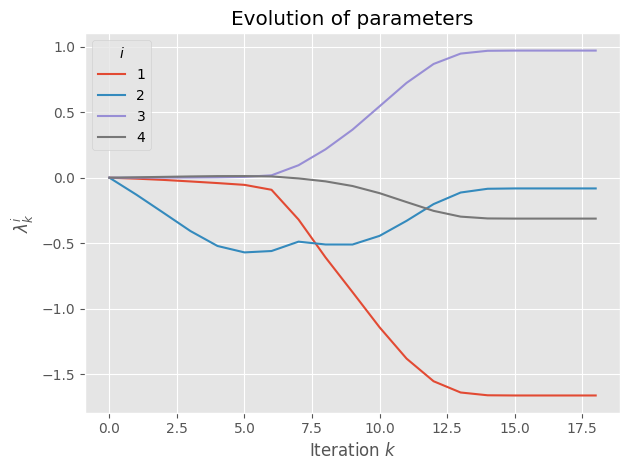

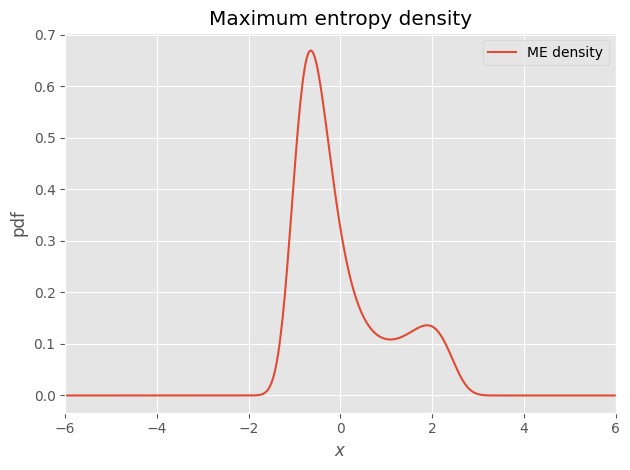

In [12]:
ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(1,3),
                     f_vector=d.f_constraint_skewkurt)
ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution()

The resulting parameters:
  Lambda_1 = -2.267
  Lambda_2 = 1.375
  Lambda_3 = 1.580
  Lambda_4 = -0.884


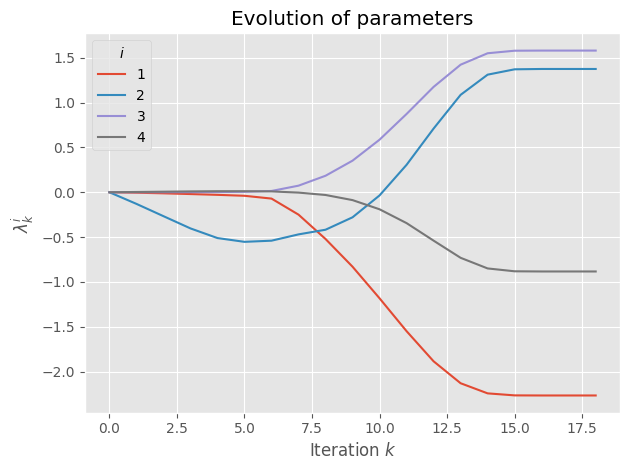

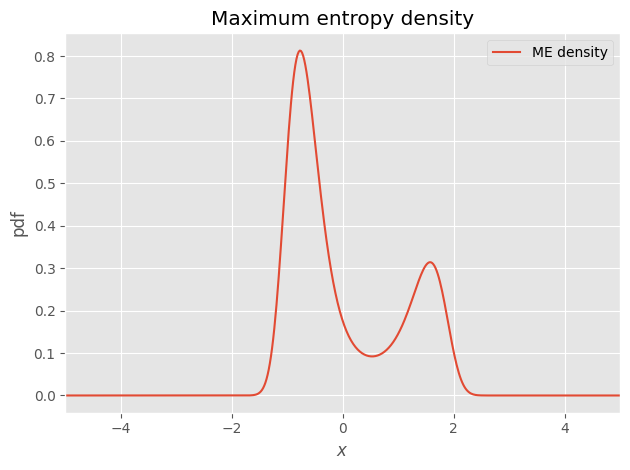

In [13]:
ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=100,
                     b_constraints=d.b_constraint_skewkurt(0.7, 2),
                     f_vector=d.f_constraint_skewkurt)

ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution(xlim=(-5,5))

The resulting parameters:
  Lambda_1 = -2.339
  Lambda_2 = 1.434
  Lambda_3 = 1.636
  Lambda_4 = -0.916


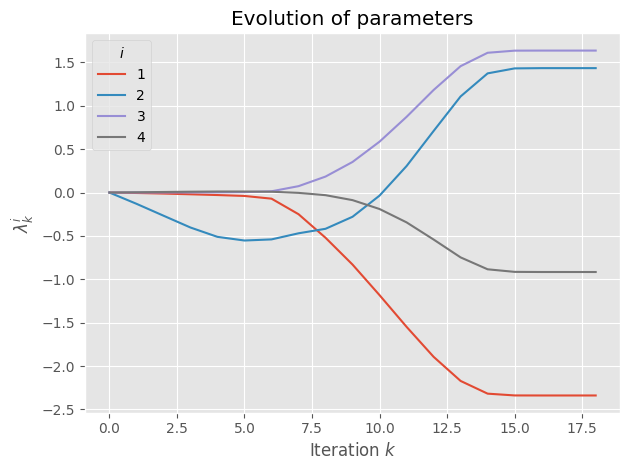

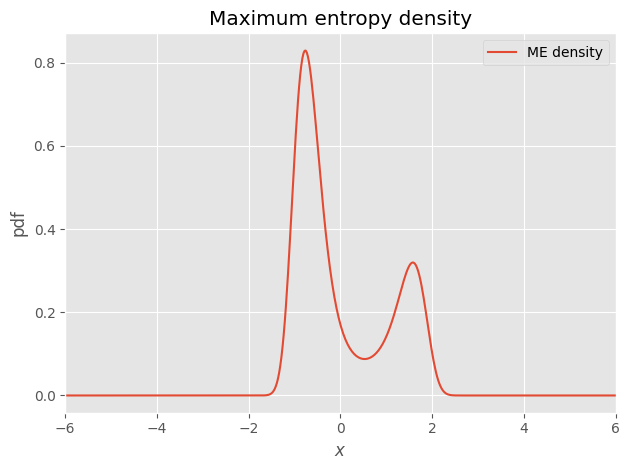

In [14]:

u = 6
l = -u
n = 40
skew = 0.7
kurt = 2

ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(skew,kurt),
                     f_vector=d.f_constraint_skewkurt)

ob_skewkurt.visualize_algorithm()
ob_skewkurt.visualize_solution()

In [22]:
u = 6
l = -u
n = 200

skews = np.arange(0, 4, 0.25)
kurts = np.arange(0,  10, 0.1)

Ss, Ks = np.meshgrid(skews,kurts)

convergence_indicator_mat = np.zeros((len(skews),len(kurts)))

for i, skew in enumerate(skews):
    print(f"progressie: {i}")
    for j, kurt in enumerate(kurts):
        ob_skewkurt = MaxEnt(support=(l,u),
                     n_quadrature=n,
                     b_constraints=d.b_constraint_skewkurt(skew,kurt),
                     f_vector=d.f_constraint_skewkurt,
                     warning_convergence=False, 
                     message_norm=False)
        if(ob_skewkurt._converges):
            convergence_indicator_mat[i][j] = 1
        else:
            convergence_indicator_mat[i][j] = 0


progressie: 0


/home/liselotp/BRP/max_entropy/python_files/maxent.py:338: RuntimeWarning: overflow encountered in exp
  c, s = quad(lambda x: np.exp(np.inner(self._la,


progressie: 1
progressie: 2
progressie: 3
progressie: 4
progressie: 5
progressie: 6
progressie: 7
progressie: 8
progressie: 9
progressie: 10
progressie: 11
progressie: 12
progressie: 13
progressie: 14
progressie: 15


In [25]:
def convergence_plot(X, Y, Z, xlab="Parameter 1", ylab="Parameter 2", title="Convergence indicator", save_as=None):
    fig, ax = plt.subplots() 
    
    ax.set_title(title) 
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    # ax.set_xlim((0,4))

    cset1 = ax.contourf(X,Y,Z,levels=1)
    fig.colorbar(cset1, ax=ax)

    if(save_as is not None):
        plt.savefig(save_as) 
    plt.show() 

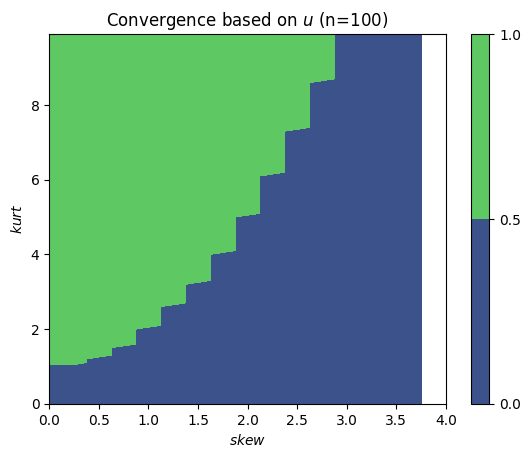

In [ ]:
# convergence_plot(skews,kurts,convergence_indicator_mat.T,
#                  xlab="skewness",ylab="kurtosis",
#                  title=f"Convergence based on $u$ ($n={n}$)",
#                  save_as="conv_plot_a_u.pdf")

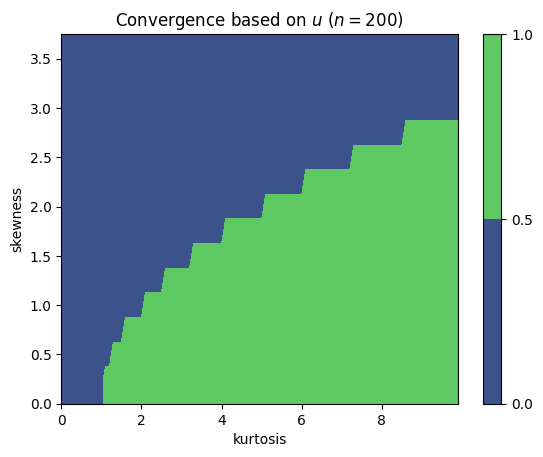

In [26]:
convergence_plot(kurts,skews,convergence_indicator_mat,
                 xlab="kurtosis",
                 ylab="skewness",
                 title=f"Convergence based on $u$ ($n={n}$)",
                 save_as=f"conv_plot_a_u_n{n}.pdf")